In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/manishanker/Statistics_ML_26Aug/master/doubts/orange_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Tree,age,circumference
0,1,1,118,30
1,2,1,484,58
2,3,1,664,87
3,4,1,1004,115
4,5,1,1231,120


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     35 non-null     int64
 1   Tree           35 non-null     int64
 2   age            35 non-null     int64
 3   circumference  35 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB


In [5]:
df.describe()

,Unnamed: 0,Tree,age,circumference
count,35.000000,35.00000,35.000000,35.000000
mean,18.000000,3.00000,922.142857,115.857143
std,10.246951,1.43486,491.864528,57.488179
min,1.000000,1.00000,118.000000,30.000000
25%,9.500000,2.00000,484.000000,65.500000
50%,18.000000,3.00000,1004.000000,115.000000
75%,26.500000,4.00000,1372.000000,161.500000
max,35.000000,5.00000,1582.000000,214.000000


In [6]:
df.shape

(35, 4)

In [7]:
df.isna().sum()

Unnamed: 0       0
Tree             0
age              0
circumference    0
dtype: int64

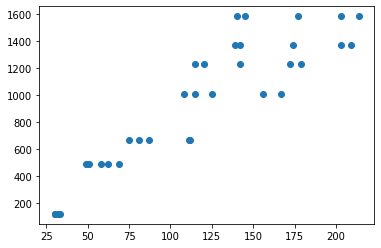

In [8]:
plt.scatter(df['circumference'], df['age'])

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np
model = LinearRegression()

In [10]:
df['circumference'].values.reshape(-1,1)

array([[ 30],
       [ 58],
       [ 87],
       [115],
       [120],
       [142],
       [145],
       [ 33],
       [ 69],
       [111],
       [156],
       [172],
       [203],
       [203],
       [ 30],
       [ 51],
       [ 75],
       [108],
       [115],
       [139],
       [140],
       [ 32],
       [ 62],
       [112],
       [167],
       [179],
       [209],
       [214],
       [ 30],
       [ 49],
       [ 81],
       [125],
       [142],
       [174],
       [177]], dtype=int64)

In [11]:
X = df['circumference'].values.reshape(-1,1)
y = df['age']

In [12]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
model.score(X,y)

0.8345166945883684

In [14]:
model.coef_

array([7.81599844])

In [15]:
y_pred = model.predict(X)

In [16]:
model.predict([[115]])

array([915.44342991])

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

38891.62301543713

## StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
scaled_df = scaler.transform(df)

In [20]:
scaled_df[:,3]

array([-1.51527843, -1.02111109, -0.50929491, -0.01512757,  0.0731166 ,
        0.46139094,  0.51433744, -1.46233193, -0.82697392, -0.08572291,
        0.70847461,  0.99085595,  1.53796979,  1.53796979, -1.51527843,
       -1.14465292, -0.72108092, -0.13866941, -0.01512757,  0.40844444,
        0.42609327, -1.47998076, -0.95051575, -0.06807407,  0.90261178,
        1.11439778,  1.64386279,  1.73210696, -1.51527843, -1.17995059,
       -0.61518792,  0.16136076,  0.46139094,  1.02615361,  1.07910011])

In [21]:
df1 = pd.DataFrame(scaled_df,columns=['x1','x2','age_sc','circumference_sc'])

In [22]:
df1.head()

,x1,x2,age_sc,circumference_sc
0,-1.683251,-1.414214,-1.658755,-1.515278
1,-1.584236,-1.414214,-0.903784,-1.021111
2,-1.485221,-1.414214,-0.532487,-0.509295
3,-1.386207,-1.414214,0.168852,-0.015128
4,-1.287192,-1.414214,0.637099,0.073117


In [23]:
X = df1['circumference_sc'].values.reshape(-1,1)
y = df1['age_sc']

In [24]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
model.score(X,y)

0.8345166945883684

In [26]:
model.coef_

array([0.91351885])

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

1045666.1084846132